In [ ]:
# Just run this notebook through your colab by uploading it to google colab

# Model Logistic Regression untuk Prediksi Fraud in Bank Loan

In [ ]:
# Import Needed package for Data Processing

import pandas as pd # Package buat prosesing tabel
import numpy as np # Package buat prosesing array
import matplotlib.pyplot as plt # Package buat nampilin graph

## 1. Import Dataset

In [ ]:
dataset_bank_loan = pd.read_csv( "https://docs.google.com/spreadsheets/d/e/2PACX-1vTwwkQeP6h1sevp3quX8z5iVZvlqVqg8fHbGEg9Kd9wOfEyJhGLmLrT-aBtVQp3v3jgevCag8QloW2y/pub?gid=974276695&single=true&output=csv" )

In [ ]:
# Lihat dataset Bank Loan

dataset_bank_loan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


## 2. Cek Nilai Dataset

In [ ]:
# Cek Data statistik bank loan

dataset_bank_loan.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [ ]:
# Cek Nilai Null atau tidak Valid dari dataset Bank Loan

dataset_bank_loan.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

**Bisa dilihat banyak data null pada kolom default. Karena kolom default menyatakan banyak data yang tidak membayar pinjamaan dan kita akan memprediksi apakah membayar pinjaman atau tidak maka kita hapus semua data yang tidak ada kolom default.**

In [ ]:
dataset_bank_loan_without_null = dataset_bank_loan.dropna( subset= [ "default" ], axis = 0 )

## 2. Bikin Model Logistic Regression

In [ ]:
# Import Model untuk prediksi Customer bayar pinjaman atau tidak

from sklearn.linear_model import LogisticRegression # Package for model logistic Regression
from sklearn import metrics # Package for metrics evaluation for Logistic Regression

In [ ]:
# Buat fungsi model Logistic Regression untuk memprediksi Customer bayar pinjaman atau tidak

model_logistic_regression = LogisticRegression()

In [ ]:
# Buat dataset dan target untuk prediksi Customer bayar pinjaman atau tidak

Y = dataset_bank_loan_without_null["default"].values.reshape(-1,1)
X = dataset_bank_loan_without_null.drop( ["default"], axis = 1).values.reshape(-1,8) #Reshape menjadi (-1, jumlah kolom data untuk prediksi customer bayar pinjaman atau tidak )


In [ ]:
# Proses model Machine Learning untuk memprediksi Customer bayar pinjaman atau tidak

model_logistic_regression.fit( X, Y )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Bikin prediksi model Logistic Regression untuk Customer bayar pinjaman atau tidak

customer_pay_loan_or_not = model_logistic_regression.predict( X )

In [ ]:
# Lihat prediksi model Logistic Regression untuk Customer bayar pinjaman atau tidak

customer_pay_loan_or_not

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0.

## 3. Evaluasi Model Logistic Regression

In [ ]:
# Liat prediksi customer bayar pinjaman atau tidak

dataset_bank_loan_without_null_with_prediction = dataset_bank_loan_without_null.copy()

dataset_bank_loan_without_null_with_prediction[ "Customer_Pay_Loan_or_Not" ] = customer_pay_loan_or_not # Tambahkan prediksi Model Logistic Regression Customer bayar loan or not ke dataset

dataset_bank_loan_without_null_with_prediction

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Customer_Pay_Loan_or_Not
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0,0.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0,0.0


**Kemudian cek akurasi dan F1 score dari prediksi model Logistic Regression untuk memprediksi Customer bayar loan or not**

In [ ]:
accuracy_model_logistic_regression = metrics.accuracy_score( Y , customer_pay_loan_or_not )

print( "Accuracy model Logistic Regression Customer pay Loan or Not is : " + str( accuracy_model_logistic_regression ))

Accuracy model Logistic Regression Customer pay Loan or Not is : 0.8085714285714286


In [ ]:
F1_score_model_logistic_regression = metrics.f1_score( Y , customer_pay_loan_or_not )

print( "F1 Score model Logistic Regression predict Customer pay loan or not is : " + str( F1_score_model_logistic_regression ))

F1 Score model Logistic Regression predict Customer pay loan or not is : 0.58125


In [ ]:
customer_pay_loan_or_not.reshape( -1,1)

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [ ]:
Y.shape

(700, 1)

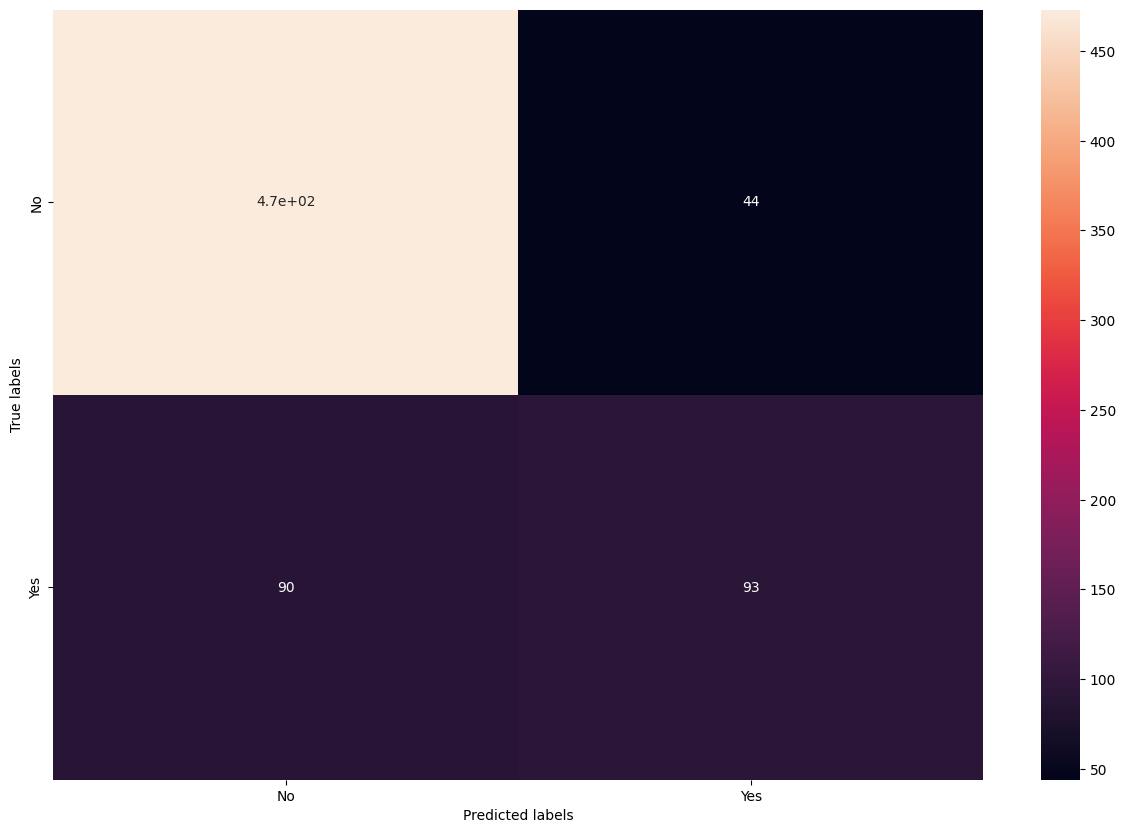

In [ ]:
# Kemudian bikin confusion matrix untuk evaluasi Model Logistic Regression Customer pay loan or not

# Plot confusion matrix
from sklearn.metrics import confusion_matrix # Package untuk visualisasi confusion matrix untuk memprediksi Customer pay loar or not
import seaborn as sns # Package to visualize confusion matrix memprediksi Customer pay loan or not

plt.figure(figsize= (15,10)) # Atur ukutan con

cm= confusion_matrix(Y, customer_pay_loan_or_not , labels=[0,1]) # confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
#ax.set_title('Confusion Matrix '+ str(i));
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [ ]:
print( "Coefficient of Logistic Regression Model is : " + str( model_logistic_regression.coef_ ))

Coefficient of Logistic Regression Model is : [[ 0.03412396  0.08967674 -0.25685892 -0.10451461 -0.0081088   0.06886874
   0.61620958  0.0597685 ]]


In [ ]:
# Create dataframe for feature importance of logistic regression

dict_importance_every_feature = { "Importance_Feature" : abs( model_logistic_regression.coef_[0]) } # Make dictionary with column "Importance Feature" to have feature importance of Logistic Regression Model

importance_every_feature_dataframe = pd.DataFrame( dict_importance_every_feature ) # Convert dictionary ke dataframe Pandas

# Tambahkan index datagram feature importance dengan nama kolom di dataset bank loan without null
importance_every_feature_dataframe.index = dataset_bank_loan_without_null.drop( "default" , axis = 1).columns

#plt.plot( model_logistic_regression.coef_[0].reshape(-1) , kind= "barh")
importance_every_feature_dataframe

,Importance_Feature
age,0.034124
ed,0.089677
employ,0.256859
address,0.104515
income,0.008109
debtinc,0.068869
creddebt,0.616210
othdebt,0.059769


<Axes: >

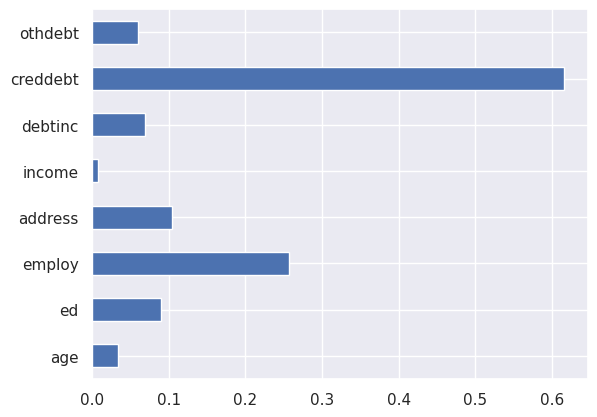

In [ ]:
sns.set_theme() # Function to make Feature Importance evaluation more beautiful

importance_every_feature_dataframe[ "Importance_Feature" ].plot( kind= "barh" )